# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [3]:
def apply_svd_custom(X_train, X_test, n_components):
    # Step 1: Compute the covariance matrix (X_train^T * X_train)
    covariance_matrix = np.dot(X_train.T, X_train)
    
    # Step 2: Perform eigendecomposition on the covariance matrix
    # This gives us the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 3: Sort the eigenvectors by eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices of sorted eigenvalues (descending)
    top_eigenvectors = eigenvectors[:, sorted_indices[:n_components]]  # Take top 'n_components' eigenvectors
    
    # Step 4: Project the training and test data onto the new lower-dimensional space
    X_train_svd = np.dot(X_train, top_eigenvectors)
    X_test_svd = np.dot(X_test, top_eigenvectors)
    
    return X_train_svd, X_test_svd

n_components = 100

# Apply SVD for dimensionality reduction
X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

# Train a logistic regression model on the reduced data
model = LogisticRegression(max_iter=1000)
model.fit(X_train_svd, y_train)

# Predict on the test set
y_pred = model.predict(X_test_svd)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9177142857142857
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.86      0.87      1273
           6       0.94      0.96      0.95      1396
           7       0.92      0.94      0.93      1503
           8       0.89      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [5]:
svd_components = [784, 300, 150, 100, 50]  # Adjust these values as needed

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)
    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    # Store the results
    results.append((n_components, accuracy, training_time))
    
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")

# Optionally, you can analyze the results further, like plotting accuracy vs. number of components

Training models with different levels of SVD preprocessing...
Applying custom SVD with 784 components...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 784, Accuracy: 0.9209, Training time: 1028.6445 seconds
Applying custom SVD with 300 components...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 300, Accuracy: 0.9205, Training time: 290.8185 seconds
Applying custom SVD with 150 components...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 150, Accuracy: 0.9198, Training time: 109.6889 seconds
Applying custom SVD with 100 components...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 100, Accuracy: 0.9181, Training time: 69.4330 seconds
Applying custom SVD with 50 components...


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


SVD components: 50, Accuracy: 0.9085, Training time: 19.1572 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


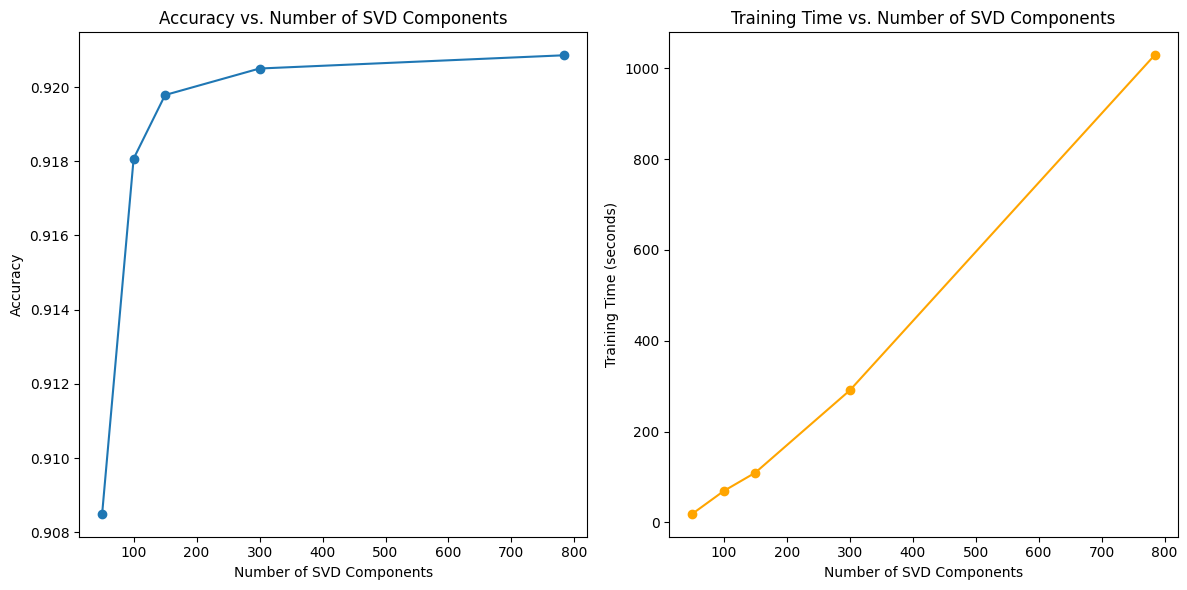

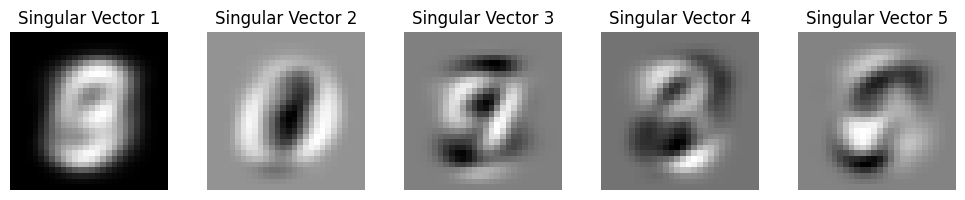

In [6]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

import matplotlib.pyplot as plt

# Unpack results for plotting
components = [result[0] for result in results]  # Number of components
accuracies = [result[1] for result in results]  # Accuracy
training_times = [result[2] for result in results]  # Training time

# Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(components, accuracies, marker='o')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of SVD Components')

# Plot Training Time vs. Number of SVD Components
plt.subplot(1, 2, 2)
plt.plot(components, training_times, marker='o', color='orange')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time vs. Number of SVD Components')

plt.tight_layout()
plt.show()

def plot_top_singular_vectors(X_train, n_vectors=5):
    # Perform SVD on the training set (without dimensionality reduction)
    U, s, Vt = np.linalg.svd(X_train, full_matrices=False)
    
    # Get the top singular vectors (right singular vectors in Vt)
    top_singular_vectors = Vt[:n_vectors]  # Top n_vectors singular vectors
    
    plt.figure(figsize=(10, 2))
    for i, vec in enumerate(top_singular_vectors):
        # Reshape each vector into 28x28 image
        singular_image = vec.reshape(28, 28)
        
        plt.subplot(1, n_vectors, i + 1)
        plt.imshow(singular_image, cmap='gray')
        plt.title(f'Singular Vector {i + 1}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to plot the top 5 singular vectors
plot_top_singular_vectors(X_train)


## Part 6: Analyze / Conclusion 

YOUR ANSWER: The accuracy of the model increases drastically as the number of SVD components increase. The model captures more variance in the data, improving accuracy. However, it starts to wean off at a certain point. After about 150 components, increasing the number of SVD components adds does not add to the accuracy, indicating that most of the important information is already captured by the top 150 components. 
This makes sense when using SVD for dimensionality reduction, because beyond a certain point, adding more components doesn’t significantly improve performance. This would mean that the most optimal spot would be around 150 components. Here, the accuracy is close to the maximum, and increasing the number of components results in minimal accuracy improvements.

The training time seems ot increase (linearly, or exponentionally) with the number of SVD components, so the more SVD components to train, the more time it will take. This is to be expected, since more components mean more features for the model to process and learn from. If we combine the information from this graph with the other graph, we can say that the optimal number of components would be around 150 components, since accuracy beyond that is minimal and the training time won't take as much time as it would with more components.

SV1-3 capture the broader patterns across digits. These vectors contribute the most to explaining the variance in the dataset, i.e., general features that are prevalent across multiple digit classes.
SV4-5: Capture more specific features that differentiate similar-looking digits.The patterns become more specific.